In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from abupy import ABuSymbolPd

amex_df = pd.read_csv('../chapter4/gen/amex_df.csv',
                           parse_dates=True,
                           index_col=0)

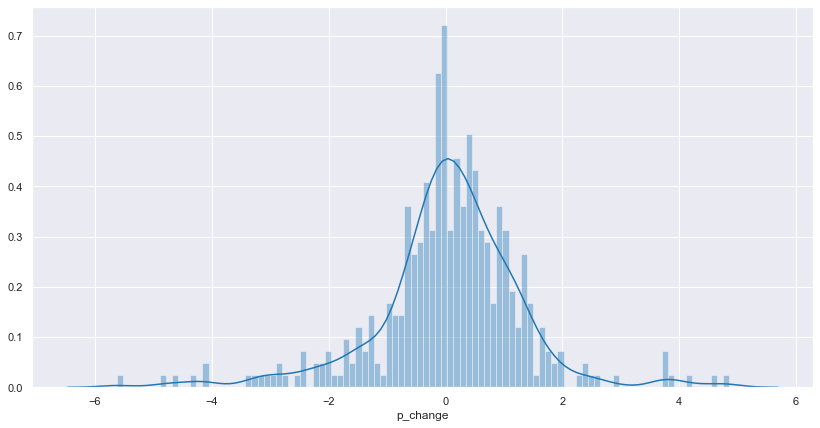

In [35]:
import seaborn as sns

sns.distplot(amex_df['p_change'],
             bins=100)

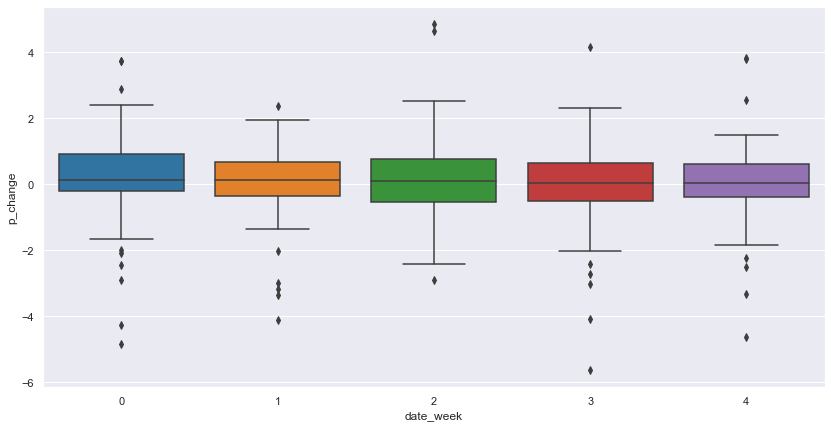

In [36]:
sns.boxplot(x='date_week',
            y='p_change',
            data=amex_df)


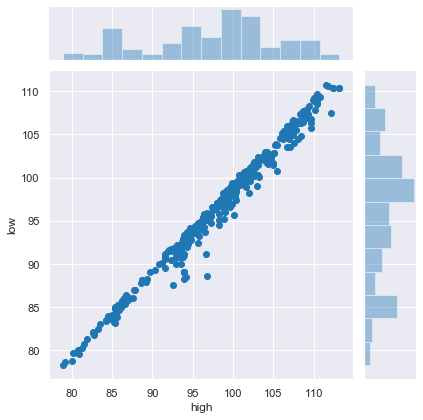

In [37]:
sns.jointplot(amex_df['high'],
              amex_df['low'])

In [38]:
# Create Google
change_df = pd.DataFrame({
    'Google': ABuSymbolPd.make_kl_df(
        'usGOOG', n_folds=2
    ).p_change
})
# Join Apple
change_df = change_df.join(pd.DataFrame({
    'Apple': ABuSymbolPd.make_kl_df(
        'usAAPL', n_folds=2
    ).p_change
}),
how='outer')
# Join Facebook
change_df = change_df.join(pd.DataFrame({
    'Facebook': ABuSymbolPd.make_kl_df(
        'usFB', n_folds=2
    ).p_change
}),
how='outer')
# Join Baidu
change_df = change_df.join(pd.DataFrame({
    'Baidu': ABuSymbolPd.make_kl_df(
        'usBIDU', n_folds=2
    ).p_change
}),
how='outer')
# Join Alibaba
change_df = change_df.join(pd.DataFrame({
    'Alibaba': ABuSymbolPd.make_kl_df(
        'usBABA', n_folds=2
    ).p_change
}),
how='outer')

change_df.head()


,Google,Apple,Facebook,Baidu,Alibaba
2017-06-05,0.828,-0.978,0.013,-0.155,0.999
2017-06-06,-0.723,0.338,-0.534,-0.833,-0.598
2017-06-07,0.462,0.596,0.203,0.958,0.818
2017-06-08,0.237,-0.245,1.038,-0.949,13.292
2017-06-09,-3.415,-3.878,-3.303,-2.520,-2.037


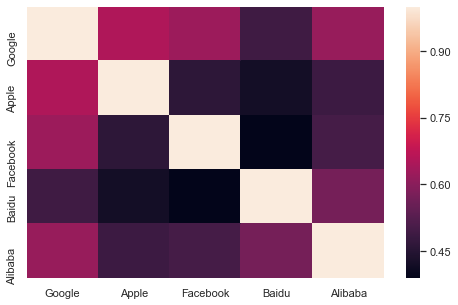

In [39]:
corr = change_df.corr()
_, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, ax = ax)